# Preface:
first of all we import some Library such as (Qutip ) 
and set the defaults for Plot

In [1]:
from qutip import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

The Following two Boxs Will Demonstrate how we generate the data using qutip 

In [3]:
b = qutip.rand_dm(4)
aa =  qutip.Qobj(b, dims=[[2, 2], [2, 2]])

Density_matrix = aa.full()

transposed =  qutip.partial_transpose ( aa , [ 0 , 1])
transposed_m = transposed.full()

tr_det = np.linalg.det(transposed_m)
den_det = np.linalg.det(Density_matrix)

if (np.imag(den_det) < 1.0 * 10 ** -15) and (np.imag(tr_det) < 1.0 * 10 ** -15):
    print (np.real(den_det))
    print (np.real(tr_det))


0.00016966226996407372
-0.004035562842997648


# Data Generation :

The Method used for Data Generation is to use qutip and generate a Random Density Matrice and then Calculate the 
Measurements on the Generated Density Matrice 

but first we need to define Pauli's Matrices so we can Calculate the Features.

then we can calculate the Parital Transpose Determinant on the Density Matrice and Decide wheater It's Entangled or not

In [4]:
#Defining the Pauli's Matrices and Identity
sx = np.array ([[0 , 1 ]
              ,[1 , 0 ]])

sy = np.array ([[0 , -1j ]
              ,[1j , 0  ]])


sz = np.array ([[1 , 0  ]
              ,[0 , -1 ]])

I1 = np.eye(2)
feature_list = []
for i in (sx , sy , sz ,I1  ):
    for j in ( sx , sy , sz , I1 ):
        mmde = qutip.tensor (qutip.Qobj(i) , qutip.Qobj(j))
        feature_list.append(mmde.full())


In [5]:
%%time
sams = []
n_samples = 100000
for i in range (n_samples):
    gen_mat = qutip.Qobj(qutip.rand_dm(4), dims=[[2,2],[2,2]]) 
    ptp = qutip.partial_transpose(gen_mat , [0,1] )
    den_mat = gen_mat.full()
    ptp_mat = ptp.full()
    first = np.linalg.det(den_mat)
    sec = np.linalg.det(ptp_mat)
    if (np.imag(first) < 1.0 * 10 ** -15) and (np.imag(sec) < 1.0 * 10 ** -15):
        sams.append([den_mat , np.real(first) , np.real(sec)])
    else:
        break
        
print (len(sams))

100000
Wall time: 1min 46s


## Saving/Loading the Original Data : 

we can save the data in the following code:
the saving format will be ( Density Matirx , Determinant of Density Matirx , Determinant of Partial Transposed Density Matrix)

In [6]:
# you can regenerate the data running the code in the top Box 
np.save('data_zero', sams)

In [7]:
# or you can Load the Already saved data in the form of ( density_matrice , Determinant of Denstiy matrice , Determinant 
# of Partial Transoposed Denstiy matrice)
data_z = np.load('data_zero.npy')
np.shape(data_z)

(100000, 3)

# reforming the Data :
due to the using the Classification Method or Regression we need to reform the data 

the order of stored features is:

 $$Features = \begin{bmatrix}
\sigma_x\otimes\sigma_x & \sigma_x\otimes\sigma_y & \sigma_x\otimes\sigma_z & \sigma_x\otimes\ \mathbb{1} 
\\ \sigma_y\otimes\sigma_x & \sigma_y\otimes\sigma_y & \sigma_y\otimes\sigma_z & \sigma_y\otimes\ \mathbb{1}
\\ \sigma_z\otimes\sigma_x & \sigma_z\otimes\sigma_y & \sigma_z\otimes\sigma_z & \sigma_z\otimes\ \mathbb{1}
\\ \mathbb{1}\otimes\sigma_x & \mathbb{1}\otimes\sigma_y & \mathbb{1}\otimes\sigma_z & \mathbb{1}\otimes\ \mathbb{1}
\end{bmatrix}$$

but ofcoures the shape of features in the following code is (16 , 1)

In [10]:
%%time
n_samples = 100000
n_feature = 16
Class = 0 # if 1 the data will be stored in classification Mode otherwise data will be stored in regression Mode 
count = 0 
xsams = np.empty((n_samples , n_feature))
ysams = np.empty((n_samples , 1))
for (mmd_mat , det_asl , det_tps) in data_z:
    counte = 0
    for m in range (n_feature):
        xsams [count , counte] =np.real(np.trace (np.matmul(feature_list[m],mmd_mat)))
        counte += 1
    if Class == 1 :
        if det_tps < 0 :
            ysams[count] = 1
        else : 
            ysams[count] = 0
    else :
        ysams[count] = det_tps
    count += 1
ysams = ysams.reshape(n_samples , )

Wall time: 9.14 s


## Saving/Loading the Reformed Data:

In [11]:
# you can save the data in following form which generated from the syntax above 
np.save('data_features' , xsams)
if Class==1 :
    np.save('data_Class' , ysams)
else:
    np.save('data_y' , ysams)

In [53]:
# or you can load the saved data !
xsams = np.load('data_features.npy')
Class =0 # choosing which type of data you want
if Class == 1:
    ysams = np.load('data_Class.npy')
else :
    ysams = np.load('data_y.npy')

# Data Analysis : 

## Entangled or Not ? 

In [13]:
# now we want to Calculate the percent of data which is entangled
count = 0
if Class ==0:
    for i in range (n_samples):
        if ysams[i] < 0:
            count +=1

if Class ==1:
    for i in range (n_samples):
        if ysams[i]==1:
            count +=1

            
print("{} percent of the stored data is entangled ".format(100*(count)/n_samples))



68.194 percent of the stored data is entangled 


## Pure State or Not ?

In [14]:
# now we want to Calculate the percent of data which is Mixed State
count_pure = 0
for (mmd_mat , det_asl , det_tps) in data_z:
    a=np.real(np.trace (np.matmul(mmd_mat,mmd_mat)))
    if a <= 0.99 :
        count_pure +=1
            
print("{} percent of the stored data is Mixed ".format(100*(count_pure)/n_samples))

99.985 percent of the stored data is Mixed 


## Histograms :

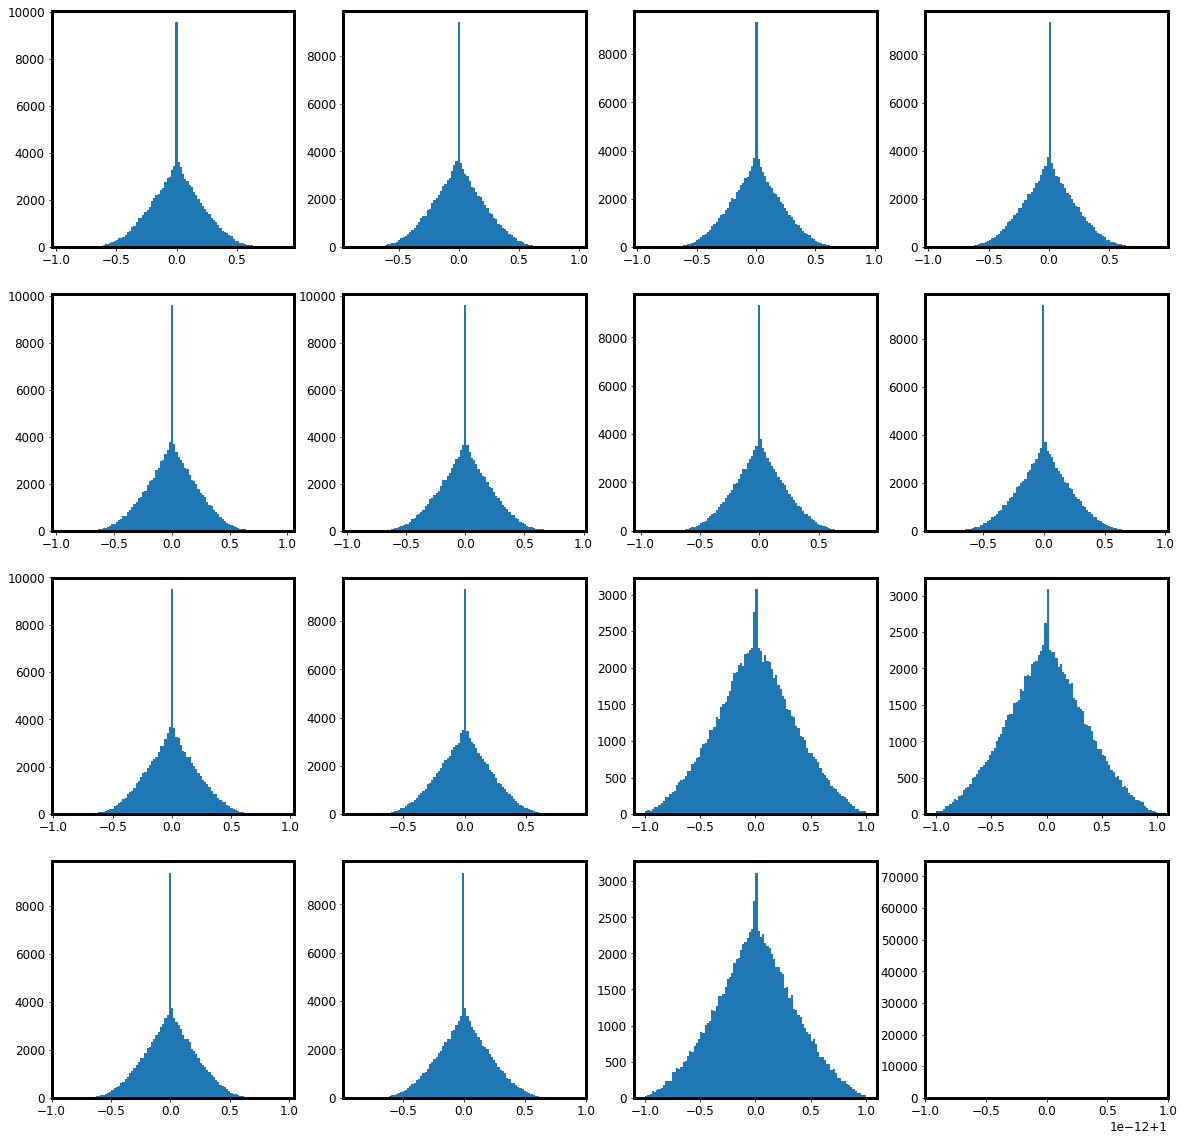

In [15]:
# Histograms 
fig = plt.figure(figsize=(20,20))

ax=[]
for i in range(n_feature) :
    ax.append( fig.add_subplot(4,4,i+1) )
    ax[i].hist(xsams[:,i],bins=100)

plt.show()
#plt.tight_layout()
plt.close()

## Entanglement and Features :

in this part we plot the Determinant of Partial Transposed Density Matrix vs.Features

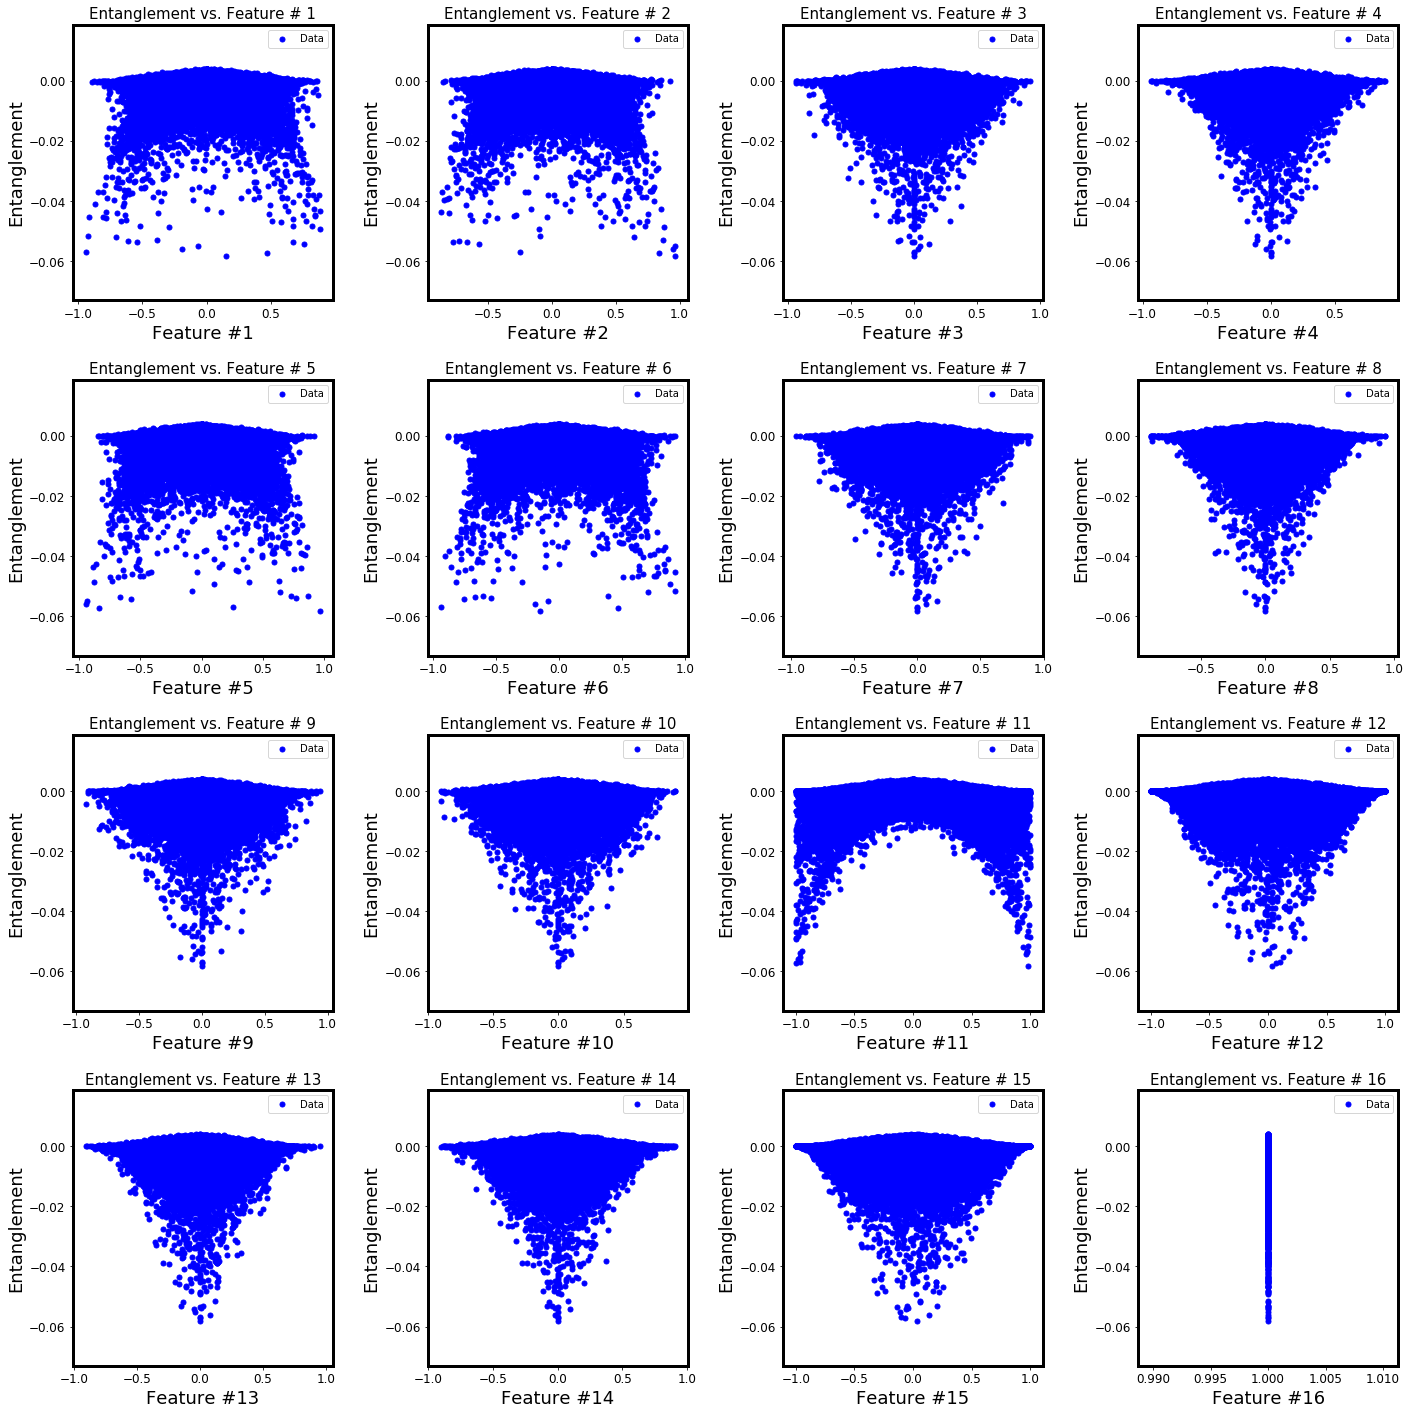

In [16]:
# without Classification
    
f = plt.figure(figsize=(20,20))
for i in range(n_feature):
    ax = f.add_subplot(4, 4, i + 1, xlabel="Feature #" + str(i+1), ylabel='Entanglement', title="Entanglement vs. Feature # "+ str(i+1) )
    ax.scatter(xsams[:, i ] , ysams, color='b',label='Data' )
    ax.legend(loc=0, fontsize = 10)
    
plt.tight_layout()
plt.show()

## Ploting Features vs. Features :
in this section one selected feature can be plotted against the Other Features 

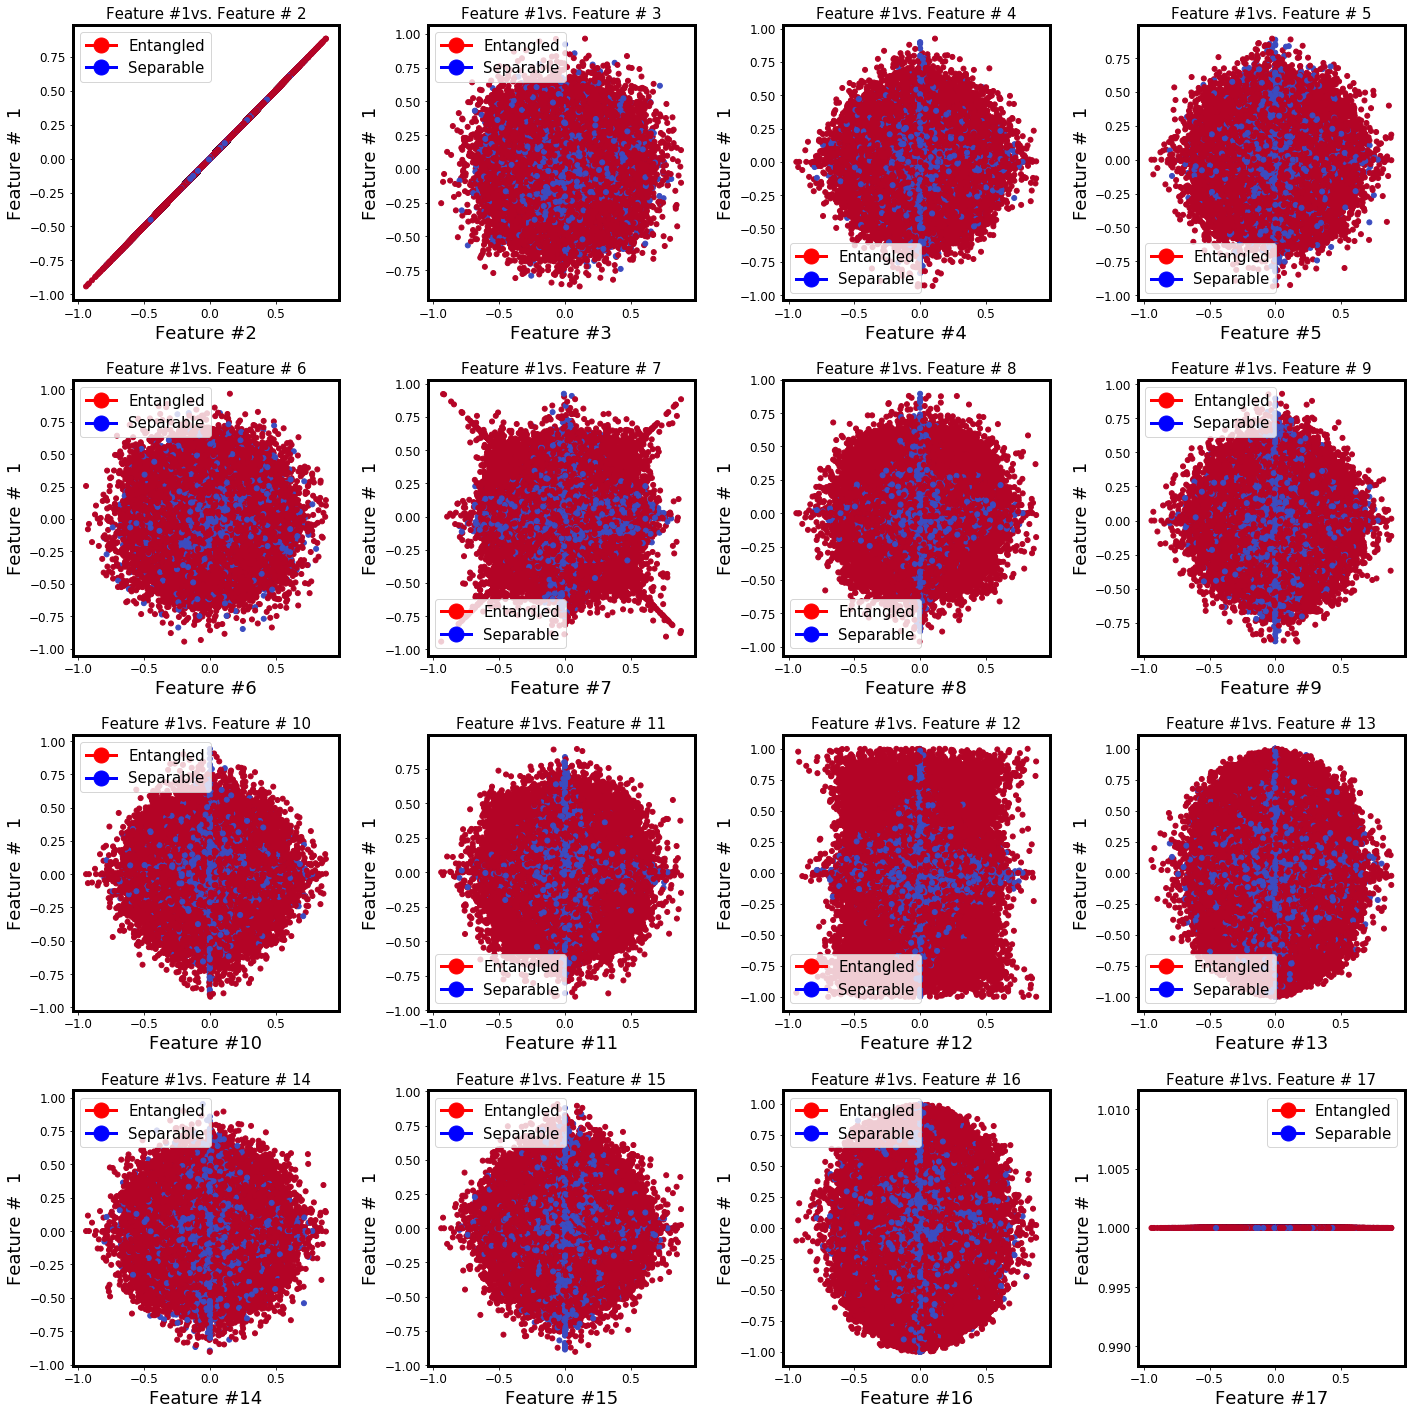

Wall time: 1min 52s


In [18]:
%%time
# with Classification Mode
sel = 0 # you can change this variable and change the selected fearue 
# the order of stored features is
# (Sx*Sx  Sx*Sy  Sx*Sz  Sx*I  )
# (Sy*Sx  Sy*Sy  Sy*Sz  Sy*I  )
# (Sz*Sx  Sz*Sy  Sz*Sz  Sz*I  )
# ( I*Sx   I*Sy   I*Sz   I*I  )

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker = 'o' , color='r' , markerfacecolor='r', markersize=15),
                Line2D([0], [0], marker = 'o' , color='b' , markerfacecolor='b', markersize=15)]

f = plt.figure(figsize=(20,20))
for i in range(n_feature):
    ax = f.add_subplot(4, 4, i + 1, xlabel="Feature #" + str(i+2), ylabel='Feature #  '+str(sel+1), title="Feature #" +str(sel+1) + "vs. Feature # "+ str(i+2) )
    ax.scatter(xsams[:,sel],xsams[:,i], c= ysams , cmap=plt.cm.coolwarm )
    ax.legend(custom_lines, ['Entangled', 'Separable'])    

plt.tight_layout()
plt.show()

## Histograms of Entangeld Data:

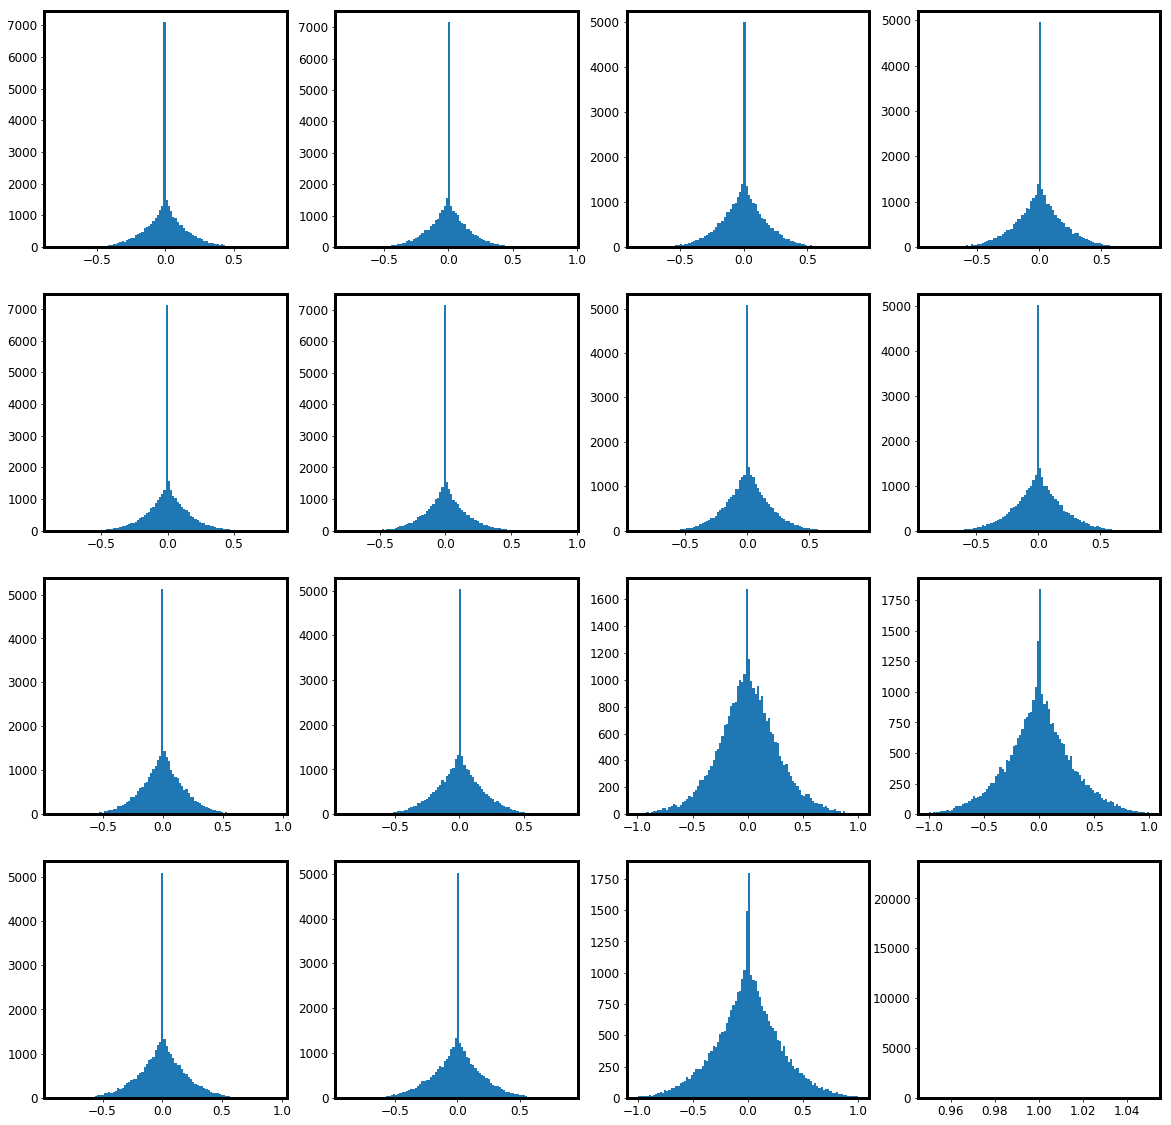

Wall time: 3.38 s


In [19]:
%%time
# Histograms 
dellist = []
fig = plt.figure(figsize=(20,20))
ent_xsams = xsams.copy()
ent_ysams = ysams.copy()
if Class == 1 :
    for i in range (n_samples):
        if ysams[i] == 1:
            dellist.append(i)
else:
    for i in range (n_samples):
        if ysams[i] >= 0:
            dellist.append(i)


ent_xsams = np.delete( ent_xsams , dellist , 0)
ent_ysams = np.delete( ent_ysams , dellist , 0)

ax=[]
for i in range(n_feature) :
    ax.append( fig.add_subplot(4,4,i+1) )
    ax[i].hist(ent_xsams[:,i],bins=100)

plt.show()
#plt.tight_layout()
plt.close()


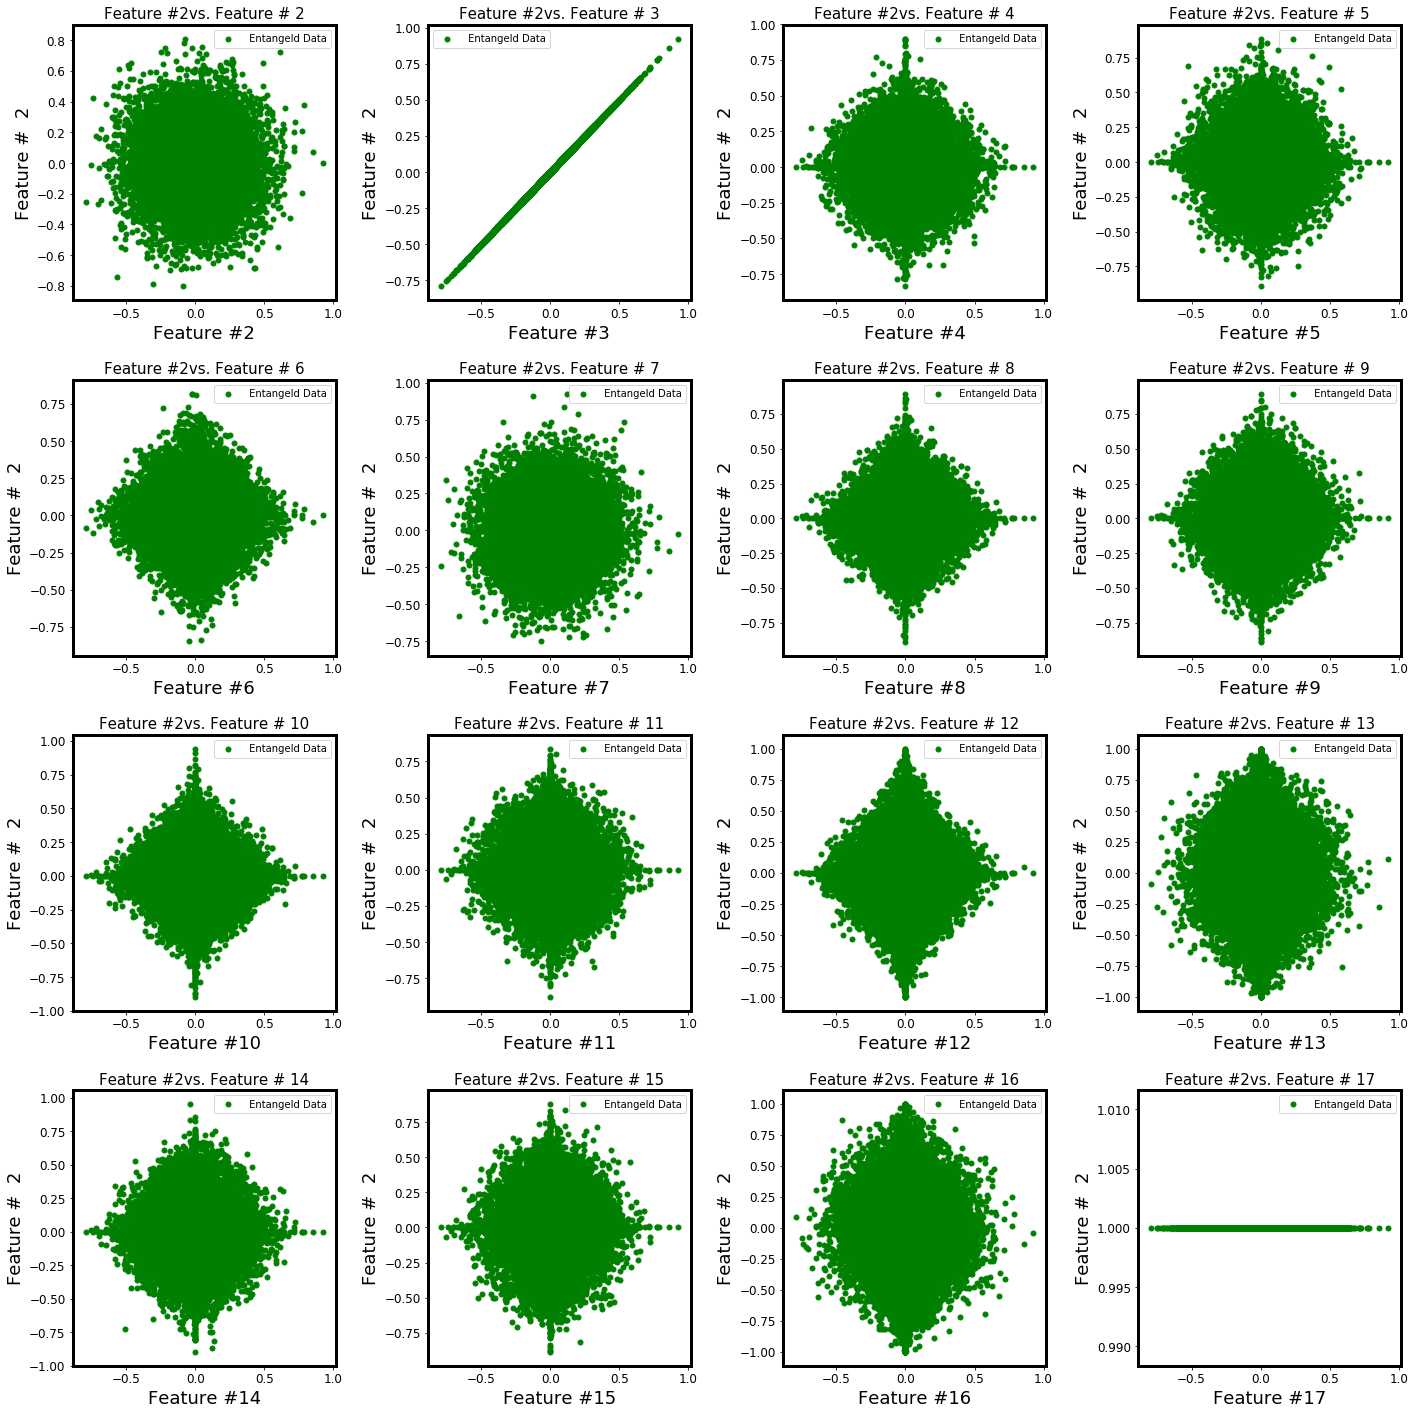

In [20]:
#  Entangled Data
sel = 1

f = plt.figure(figsize=(20,20))
for i in range(n_feature):
    ax = f.add_subplot(4, 4, i + 1, xlabel="Feature #" + str(i+2), ylabel='Feature #  '+str(sel+1), title="Feature #" +str(sel+1) + "vs. Feature # "+ str(i+2) )
    ax.scatter(ent_xsams[:, sel ] ,ent_xsams[:, i], color='g',label=' Entangeld Data' )
    ax.legend(loc=0, fontsize = 10)
    
plt.tight_layout()
plt.show()

## Correlation between Features : 

in the following section We calculate the Pearson correlation coefficient for each data to see how Correlated the Data is :

the Pearson correlation coefficient between two values can be calculated using the following formula :

$$ {\rho _x}_ y =\ \frac{COV (X , Y)}{\sigma_x \times \sigma_y} =\ \frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x \times \sigma_y} $$

after calculating the Pearson Correlation Coefficient , we show which Coefficient is bigger :

In [21]:
%%time
# calculating correlation between data :
cor_data = np.empty((n_feature,n_feature))
for i in range (n_feature):
    for j in range (n_feature):
        if i==j:
            cor_data[i , j]= 0
            continue
        else:
            cov  = np.mean(xsams[:,i]*xsams[:,j]) - (np.mean(xsams[:,i])*(np.mean(xsams[:,j])))
            stds = ((np.std(xsams[:,i]) )* (np.std(xsams[:,j])))
            cor_data[i , j]= np.abs(cov/stds)


cor_pd = pd.DataFrame(cor_data)
print (cor_pd.idxmax())

0      4
1      8
2      6
3      7
4     15
5     15
6     15
7      3
8      1
9      4
10    14
11    14
12     1
13     6
14    11
15     6
dtype: int64
Wall time: 1.24 s


# Data Preparation /  Reduction :

In [5]:
# first we scale the Data using following methods:
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler

X_scaled = scale(xsams) 


s_scaler = StandardScaler()
X_sscaled = s_scaler.fit_transform(xsams) 

mm_scaler = MinMaxScaler()
mm_scaler.fit(xsams)
X_mmscaled = mm_scaler.transform(xsams) 

r_scaler = RobustScaler()
r_scaler.fit(xsams)
X_rscaled = r_scaler.transform(xsams) 

E:\Stuff\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


## Spliting Train and Test from data :

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test  = train_test_split(xsams , ysams , random_state = 0)

In [7]:
from sklearn.model_selection import train_test_split
Xs_train , Xs_test , Ys_train , Ys_test  = train_test_split(X_scaled , ysams , random_state = 0)

In [8]:
from sklearn.model_selection import train_test_split
Xm_train , Xm_test , Ym_train , Ym_test  = train_test_split(X_sscaled , ysams , random_state = 0)

In [9]:
from sklearn.model_selection import train_test_split
Xst_train , Xst_test , Yst_train , Yst_test  = train_test_split(X_mmscaled , ysams , random_state = 0)

In [33]:
from sklearn.model_selection import train_test_split
Xr_train , Xr_test , Yr_train , Yr_test  = train_test_split(X_rscaled , ysams , random_state = 0)

# Regression Method : 

using Cross Validation for the following regression Methods :
1. Linear Regression
2. Decision Tree Regressor
3. Support Vector Machine

### Linear Regression using PolyFeatures (degree=4)

In [34]:
%%time
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import PolynomialFeatures

polytransform = PolynomialFeatures(degree=4 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       (polytransform.fit_transform(X_train))      , Y_train)

Wall time: 2min 16s


In [35]:
%%time
print( "the accuracy of Linear Regression is : {} ".format(reg_nl2.score(polytransform.fit_transform(X_test), Y_test)))

the accuracy of Linear Regression is : 1.0 
Wall time: 4.71 s


in consideration of Data size we dont run cross validation for Linear Regression because of runtime 

### Decision Tree Regressor : 

In [37]:
%%time
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 10)
tree_reg.fit(X_train,Y_train)
print( "the score on Training Data is {}" .format(tree_reg.score(X_train,Y_train)) )
print( "the score on test Data is {}".format(tree_reg.score(X_test,Y_test)) )
print("the Important Feature of this Regressor is :{}".format(tree_reg.feature_importances_))

the score on Training Data is 0.8068583604771715
the score on test Data is 0.7345072860925916
the Important Feature of this Regressor is :[0.204155   0.20369979 0.00997255 0.00119112 0.11625917 0.16840823
 0.00612736 0.00086877 0.00880833 0.00865468 0.26015397 0.00550433
 0.00179036 0.000944   0.00346233 0.        ]
Wall time: 1.18 s


#### using Cross Validation :

In [39]:
from sklearn.model_selection import cross_validate
t_reg = DecisionTreeRegressor(max_depth=10)
tree_regscores = cross_validate(t_reg , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
t_scores = pd.DataFrame(tree_regscores)
print('The result on the original data is: \n {}'.format(  t_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time    test_score   train_score
mean  2.006689    0.000807 -3.041328e-06 -2.116924e-06
std   0.236168    0.001042  1.261697e-07  6.567010e-08


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### SVR:

runtime of SVR for 100000 data is too long so we cant afford this run !

In [ ]:
%%time
from sklearn.svm import SVR
svr_nl = SVR(kernel='rbf',degree = 4, epsilon = 0.001 , gamma = 'auto' )
svr_nl.fit(X_train, Y_train )
print( "the score on Training Data is {}" .format(svr_nl.score(X_train,Y_train)) )
print( "the score on test Data is {}".format(svr_nl.score(X_test,Y_test)) )

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# using a randomSearch for a better Reggression 


params_dist_SVR = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf' , 'poly'] , 'epsilon': expon (scale = 0.01) }
svr_reg = SVR()

svr_reg_rs = RandomizedSearchCV(svr_reg, param_distributions=params_dist_SVR, cv=5, n_jobs=-1)

svr_reg_rs.fit(X_train, Y_train)
print(svr_reg_rs.best_params_)
print(svr_reg_rs.best_score_)

# Classification Methods :
using Cross Validation for following Classification Methods :
1. Decision Tree Classifier
2. Ridge Classifier
3. bayes
4. SVC
5. SGD 

### Decision Tree Classifier :

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,Y_train)

print("The accuracy of the tree classifier is: {}".format( tree_clf.score(X_train,Y_train) ) )
print("The accuracy of the tree classifier is: {}".format( tree_clf.score(X_test,Y_test) ) )

The accuracy of the tree classifier is: 1.0
The accuracy of the tree classifier is: 0.78124


In [44]:
#cross Validation 
t_clf = DecisionTreeClassifier(max_depth=10)
tree_clfscores = cross_validate(t_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
t_c_scores = pd.DataFrame(tree_clfscores)
print('The result on the original data is: \n {}'.format(  t_c_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  2.054148    0.004643   -0.228770    -0.209166
std   0.233226    0.004151    0.004596     0.003841


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## Random Forest :

In [30]:
from sklearn.ensemble import RandomForestClassifier
rdm_fo = RandomForestClassifier(n_estimators = 200)
rdm_fo.fit(X_train , Y_train)
print(rdm_fo.score(X_train , Y_train))
print(rdm_fo.score(X_test , Y_test))

1.0
0.86424


In [51]:
rdmf_clf = RandomForestClassifier(n_estimators = 200)
rdmfI_clfscores = cross_validate(rdmf_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
rdmfI_scores = pd.DataFrame(rdmfI_clfscores)
print('The result on the original data is: \n {}'.format(  rdmfI_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
         fit_time  score_time  test_score  train_score
mean  121.965480    0.651711   -0.134000          0.0
std    18.875523    0.064375    0.003466          0.0


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## Ridge Classifier :

In [46]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=4 )
lrg = RidgeClassifier()
lrg.fit( (polytransform.fit_transform(X_train)) , Y_train)
print(lrg.score( (polytransform.fit_transform(X_train)) , Y_train ))
print(lrg.score( (polytransform.fit_transform(X_test)) , Y_test ))

0.8872933333333334
0.88308


In [49]:
ridge_clf = RidgeClassifier()
ridge_clfscores = cross_validate(ridge_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
ridge_scores = pd.DataFrame(ridge_clfscores)
print('The result on the original data is: \n {}'.format(  ridge_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.099388    0.002365   -0.318060    -0.318060
std   0.021505    0.002800    0.000027     0.000003


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## SVC : 

because of the data size we can't afford this run !.

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf',degree = 4, gamma = 'auto')
svc_clf.fit(X_train,Y_train )
svc_clf.score(X_test , Y_test)

In [ ]:
# using a randomSearch for a better Classification 

from scipy.stats import expon

params_dist = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf' , 'poly']}
svc_clf1 = SVC()

svc_clf1_rs = RandomizedSearchCV(svc_clf1, param_distributions=params_dist, cv=5, n_jobs=-1)

svc_clf1_rs.fit(X_train, Y_train)
print(svc_clf1_rs.best_params_)
print(svc_clf1_rs.best_score_)

In [ ]:
svcI_clf = SVC()
svcI_clfscores = cross_validate(svcI_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
svcI_scores = pd.DataFrame(svcI_clfscores)
print('The result on the original data is: \n {}'.format(  svcI_scores.describe().loc[['mean','std']] ) )

## Bayes:

In [11]:
from sklearn.naive_bayes import GaussianNB
by_clf = GaussianNB()
by_clf.fit(Xr_train , Yr_train)
by_clf.score(Xr_test , Yr_test)

0.82672

In [14]:
from scipy.stats import expon 
params_dist_b = {'priors' : [None ] , 'var_smoothing':expon(scale = 10**-5)}
by_clf1 = GaussianNB()

by_clf1_rs = RandomizedSearchCV(by_clf1, param_distributions=params_dist_b, cv=6, n_jobs=-1)

by_clf1_rs.fit(X_train, Y_train)
print(by_clf1_rs.best_params_)
print(by_clf1_rs.best_score_)

{'priors': None, 'var_smoothing': 6.926867961871886e-06}
0.82204


In [16]:
from sklearn.model_selection import cross_validate
byI_clf = GaussianNB()
byI_clfscores = cross_validate(byI_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
byI_scores = pd.DataFrame(byI_clfscores)
print('The result on the original data is: \n {}'.format(  byI_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.113513    0.009260   -0.177160    -0.176984
std   0.009811    0.003067    0.003275     0.000259


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## SGD:

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures

polytransform = PolynomialFeatures(degree=4 )

sgd_clf = SGDClassifier(max_iter=10, tol=.15)
sgd_clf.fit(polytransform.fit_transform(Xst_train),Yst_train)

print(sgd_clf.score(polytransform.fit_transform(Xst_test),Yst_test))

0.75824


In [ ]:
# using a randomSearch for a better Classification 

from scipy.stats import expon
params_dist_SGD = { 'penalty':['none', 'l2', 'l1'],
  'alpha':expon(scale = 0.001) , 'max_iter':[10 , 20 , 30 , 40 , 50 , 60 ] , 'tol' :expon(scale =0.001) , 'epsilon': expon(scale = 0.01) }
sgd_clf = SGDClassifier()

sgd_clf_rs = RandomizedSearchCV(sgd_clf, param_distributions=params_dist_SGD, cv=5, n_jobs=-1)

sgd_clf_rs.fit(X_train, Y_train)
print(sgd_clf_rs.best_params_)
print(sgd_clf_rs.best_score_)

In [18]:
sgdI_clf = SGDClassifier()
sgdI_clfscores = cross_validate(sgdI_clf , xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
sgdI_scores = pd.DataFrame(sgdI_clfscores)
print('The result on the original data is: \n {}'.format(  sgdI_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.179326    0.001562   -0.318060    -0.318060
std   0.023522    0.004940    0.000027     0.000003


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Data Reduction using PCA :

In [19]:
from sklearn.decomposition import PCA

In [34]:
n_c = 10  ## # components we want to keep. 
pca = PCA(n_components=n_c)
pca.fit(Xr_train)

reduced_Xr_train = pca.transform(Xr_train)
print (reduced_Xr_train.shape)

(75000, 10)


In [35]:
reduced_Xr_test = pca.transform(Xr_test)
redc_Xr_test = pca.inverse_transform(reduced_Xr_test)

redc_Xr_train = pca.inverse_transform(reduced_Xr_train)

In [54]:
pca_t = PCA(n_components=n_c)
pca_t.fit(xsams)

reduced_xsams = pca.transform(xsams)
redc_Xsams = pca.inverse_transform(reduced_xsams)

## using Classification :

### Ridge Classifier:


In [24]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=4 )
lrg_1 = RidgeClassifier()
lrg_1.fit( (polytransform.fit_transform(redc_Xr_train)) , Y_train)
print(lrg_1.score( (polytransform.fit_transform(redc_Xr_train)) , Y_train ))
print(lrg_1.score( (polytransform.fit_transform(redc_Xr_test)) , Y_test ))

0.76636
0.764


In [26]:
ridge_clf = RidgeClassifier()
ridge_clfscores = cross_validate(ridge_clf , redc_Xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
ridge_scores = pd.DataFrame(ridge_clfscores)
print('The result on the original data is: \n {}'.format(  ridge_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.101539         0.0   -0.318060    -0.318060
std   0.011046         0.0    0.000027     0.000003


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### SGD:

In [27]:
sgdI_clf = SGDClassifier()
sgdI_clfscores = cross_validate(sgdI_clf , redc_Xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
sgdI_scores = pd.DataFrame(sgdI_clfscores)
print('The result on the original data is: \n {}'.format(  sgdI_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.189018    0.001562   -0.318060    -0.318060
std   0.030762    0.004940    0.000027     0.000003


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### Bayes:

In [28]:
from sklearn.model_selection import cross_validate
byII_clf = GaussianNB()
byII_clfscores = cross_validate(byII_clf , redc_Xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
byII_scores = pd.DataFrame(byII_clfscores)
print('The result on the original data is: \n {}'.format(  byII_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  0.124969    0.009373   -0.254080    -0.253901
std   0.016469    0.008067    0.003834     0.000425


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rdm_fo = RandomForestClassifier(n_estimators = 100)
rdm_fo.fit(redc_Xr_train , Y_train)
print(rdm_fo.score(redc_Xr_train , Y_train))
print(rdm_fo.score(redc_Xr_test , Y_test))

1.0
0.7846


In [52]:
rdmfII_clf = RandomForestClassifier(n_estimators = 200)
rdmfII_clfscores = cross_validate(rdmfII_clf ,  redc_Xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
rdmfII_scores = pd.DataFrame(rdmfII_clfscores)
print('The result on the reduced data is: \n {}'.format(  rdmfII_scores.describe().loc[['mean','std']] ) )

The result on the reduced data is: 
         fit_time  score_time  test_score  train_score
mean  122.290295    0.724606   -0.214770          0.0
std    15.831003    0.069945    0.002714          0.0


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## Using Regression Method with reduced Data:

### Linear Regression:

In [57]:
%%time 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
polytransform1 = PolynomialFeatures(degree=4 )
reg_nl3 = LinearRegression()
reg_nl3.fit(       (polytransform1.fit_transform(redc_Xr_train))      , Yr_train)

Wall time: 2min 14s


In [60]:
print (reg_nl3.score(polytransform1.fit_transform(redc_Xr_test) , Yr_test))

0.7424359785254078


### Decision Tree Regressor:

In [56]:
%%time 
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
t_reg = DecisionTreeRegressor(max_depth=10)
tree_regscores = cross_validate(t_reg , redc_Xsams, ysams, n_jobs=-1, scoring='neg_mean_squared_error' , cv=10)
t_scores = pd.DataFrame(tree_regscores)
print('The result on the original data is: \n {}'.format(  t_scores.describe().loc[['mean','std']] ) )

The result on the original data is: 
       fit_time  score_time    test_score   train_score
mean  2.158867    0.001562 -5.150108e-06 -3.608186e-06
std   0.150341    0.004940  3.257747e-07  2.928194e-08
Wall time: 6.86 s


E:\Stuff\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Table of Comparision : 
in this section we gather the Scores from several Methods (Regression and Classification) used above 
and show them in a Table :

with Saved in ".npy" Format we stored 100000 Data 
in which some Algorithms Can't Process Quick Enough ! 

#### without Reduction :

Regression Methods :\begin{array}{rr} \hline
Regressor :  &LinearReg (degree = 4)  &Decision Tree Reg & Svr  \\ \hline
neg Mean Squared Error  :  & 0  & -3.041328\times10^{-6} + 1.261697\times10^{-7}  &TimeOut \\ \hline
\end{array}

Classification Methods :\begin{array}{rr} \hline
Classifier :  &Decision Tree  &Random Forest  &Ridge Classifier (degree =4) & Svc & Bayes & Sgd \\ \hline
neg Mean Squared Error :  & -0.228770+0.004596  & -0.134000+0.003466  &-0.318060+0.000027 & Timeout & -0.177160+0.003275 & -0.318060+0.000027 \\ \hline
\end{array} 

#### With reduction to 10Features:

Regression Methods :\begin{array}{rr} \hline
Regressor :  &LinearReg (degree = 4)  &Decision Tree Reg & Svr  \\ \hline
neg Mean Squared Error  :  & Score : 0.742  & -5.150108\times10^{-6} +3.257747e\times10^{-7}  &TimeOut \\ \hline
\end{array}
Classification Methods :\begin{array}{rr} \hline
Classifier :  &Ridge Classifier (degree =4)  &Sgd & Bayes & random Forest \\ \hline
neg Mean Squared Error :  & -0.318060+0.000027  & -0.318060+0.000027 &-0.254080+0.003834 & -0.214770+0.002714 \\ \hline
\end{array} 


